In [1]:
# https://www.youtube.com/watch?v=9yl6-HEY7_s&list=WL&index=37&t=0s

import pandas as pd

df = pd.read_csv('car_prices.csv')

In [5]:
!type car_prices.csv

Car Model,Mileage,Sell Price($),Age(yrs)
BMW X5,69000,18000,6
BMW X5,35000,34000,3
BMW X5,57000,26100,5
BMW X5,22500,40000,2
BMW X5,46000,31500,4
Audi A5,59000,29400,5
Audi A5,52000,32000,5
Audi A5,72000,19300,6
Audi A5,91000,12000,8
Mercedez Benz C class,67000,22000,6
Mercedez Benz C class,83000,20000,7
Mercedez Benz C class,79000,21000,7
Mercedez Benz C class,59000,33000,5


In [3]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


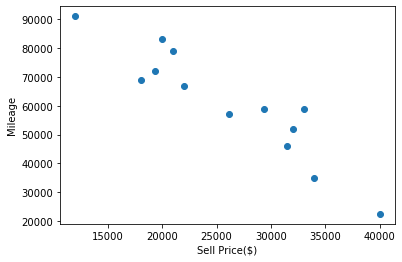

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df['Sell Price($)'], df.Mileage)
plt.ylabel('Mileage')
plt.xlabel('Sell Price($)')
plt.show()

In [22]:
df.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

In [28]:
X = df.loc[:, ['Car Model', 'Mileage', 'Age(yrs)']]
y = df.loc[:, ['Sell Price($)']].values

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
(OneHotEncoder(),['Car Model']), remainder='passthrough')

In [33]:
X = column_trans.fit_transform(X)

In [38]:
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [34]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lreg.predict([[1,0,0,30000,5]])

array([[38757.15426155]])

In [41]:
lreg.score(X,y)

0.9417050937281083

In [43]:
#### using pipeline

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Car Model', 'Mileage', 'Age(yrs)']]
y = df.loc[:, ['Sell Price($)']].values

column_transf = make_column_transformer(
(OneHotEncoder(),['Car Model']), remainder='passthrough')

lreg = LinearRegression()

pipe = make_pipeline(column_transf, lreg)

pipe.fit(X,y)

X_sample = X.sample(5, random_state=42)

pipe.predict(X_sample)

array([[20409.80511857],
       [26183.72387884],
       [18705.27236441],
       [12182.34562104],
       [28023.6135243 ]])

In [45]:
pipe.score(X,y)

0.9417050937281083